In [15]:
import pandas as pd
import os
import seaborn as sns
import numpy as np

In [14]:
pip install seaborn

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_m1/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


### Experiment 1 Data Creation (Validity Testing)

In [31]:
root_folder = '/Users/eryaouyang/Downloads/'
df = pd.read_excel(root_folder + 'cleaned_20250211.xlsx')
df = df[df.ac == 7] # Attention check
df = df.reset_index(drop=True)
df['p'] = df.index + 1
df['group2'].replace(1, 'Mega', inplace = True)
df['group2'].replace(-1, 'Nano', inplace = True)
df['mc'].replace(1, 'Mega', inplace = True)
df['mc'].replace(2, 'Nano', inplace = True)
df = df[df.group2 == df.mc]
#df = df[['group1', 'group2', 'like','comment','syn','watch','pi', 'p']]
df[['like','comment']] = df[['like','comment']].fillna(0)
df['comment_n'] = np.where(df['comment'] == 0, 0, 1)
df['group1'].replace(-1, 'Low', inplace = True)
df['group1'].replace(1, 'High', inplace = True)
df = df[['group1', 'group2', 'like','comment','syn','watch','pi', 'p','comment_n']]

In [32]:
df

,group1,group2,like,comment,syn,watch,pi,p,comment_n
0,High,Mega,1.0,0,3,1,1,1,0
1,High,Mega,0.0,0,3,2,1,2,0
2,High,Mega,1.0,It was entertaining.,5,6,3,3,1
3,High,Mega,0.0,0,6,2,1,4,0
4,High,Mega,0.0,0,4,2,2,5,0
...,...,...,...,...,...,...,...,...,...
194,Low,Nano,1.0,0,5,6,1,195,0
195,Low,Nano,1.0,Great dance moves!,7,6,1,196,1
196,Low,Nano,0.0,Dance steps didn't make since at all with the ...,2,1,1,197,1
197,Low,Nano,0.0,0,4,4,4,198,0


In [10]:
df.group1.value_counts()

High    95
Low     94
Name: group1, dtype: int64

In [7]:
df.sex.value_counts()

1    96
2    91
4     1
5     1
Name: sex, dtype: int64

In [9]:
91/189

0.48148148148148145

In [34]:
from scipy.stats import f_oneway
performance1 = df[df.group1 == 'High']['syn']
performance2 = df[df.group1 == 'Low']['syn']
f_oneway(performance1, performance2)

F_onewayResult(statistic=6.68446208653235, pvalue=0.010486775374835451)

In [35]:
performance1.mean()

5.494736842105263

In [36]:
performance1.std()

1.2621636624710213

In [37]:
performance2.mean()

4.957446808510638

In [38]:
performance2.std()

1.5788582618838012

In [11]:
df.group1.value_counts()

High    95
Low     94
Name: group1, dtype: int64

/var/folders/4p/v25mr4bd4bx5tbp7pdrb0mf80000gn/T/ipykernel_89540/3919785139.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  ax = sns.barplot(df, x="group1", y="syn", errorbar="se", hue = 'group1', edgecolor = '0.2', lw = 2,


Text(0.5, 0, 'MM Synergy')

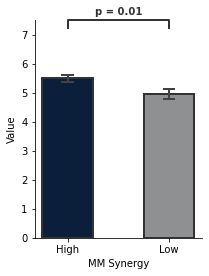

In [19]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(3, 4))
ax = sns.barplot(df, x="group1", y="syn", errorbar="se", hue = 'group1', edgecolor = '0.2', lw = 2, 
                 capsize=0.1, errwidth=2, palette=['#041E42FF', '#8D9093FF'], width=0.5, legend = False)
#ax.bar_label(ax.containers[0], fontsize=10);
#prev_lim = ax.get_ylim()[1]
max_val = df['syn'].max()
plt.plot([0, 0, 1, 1], [max_val + 0.25, max_val + 0.5, max_val + 0.5, max_val + 0.25], lw=2, color='0.2', clip_on=False)
plt.text(x = 0.5, y = max_val + 0.8, s = "p = 0.01", ha = 'center', va = 'center', fontsize=10, color='0.2', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(top = max_val + 0.5)
#plt.title('Perceived Music Motion Syncronization')
plt.ylabel('Value')
plt.xlabel('MM Synergy')

In [33]:
df.to_csv(root_folder + 'final_experiment1.csv', index = False)

## Experiment 2 (MM Synergy, Watch Intention, Purchase Intention, Likes_n)

### Data Creation

In [19]:
root_folder = '/Users/eryaouyang/Downloads/'
df = pd.read_excel(root_folder + 'cleaned_20250205.xlsx')
df.columns
df = df[df.ac == 7] # Attention check
df = df.reset_index(drop=True)
df['p'] = df.index + 1

In [22]:
group1 = df[['group1', 'v1_like', 'v1_comment', 'v1_sy', 'v1_watch', 'v1_pi','p']]
group1['pair'] = 1
group1.rename(columns={'group1': 'group', 'v1_like':'like', 'v1_comment':'comment','v1_sy':'sy', 'v1_watch':'watch','v1_pi':'pi'}, inplace=True)
group2 = df[['group2', 'v2_like', 'v2_comment', 'v2_sy', 'v2_watch', 'v2_pi','p']]
group2['pair'] = 2
group2.rename(columns={'group2': 'group', 'v2_like':'like', 'v2_comment':'comment','v2_sy':'sy', 'v2_watch':'watch','v2_pi':'pi'}, inplace=True)
group3 = df[['group3', 'v3_like', 'v3_comment', 'v3_sy', 'v3_watch', 'v3_pi','p']]
group3['pair'] = 3
group3.rename(columns={'group3': 'group', 'v3_like':'like', 'v3_comment':'comment','v3_sy':'sy', 'v3_watch':'watch','v3_pi':'pi'}, inplace=True)
group4 = df[['group4', 'v4_like', 'v4_comment', 'v4_sy', 'v4_watch', 'v4_pi','p']]
group4['pair'] = 4
group4.rename(columns={'group4': 'group', 'v4_like':'like', 'v4_comment':'comment','v4_sy':'sy', 'v4_watch':'watch','v4_pi':'pi'}, inplace=True)
group5 = df[['group5', 'v5_like', 'v5_comment', 'v5_sy', 'v5_watch', 'v5_pi','p']]
group5['pair'] = 5
group5.rename(columns={'group5': 'group', 'v5_like':'like', 'v5_comment':'comment','v5_sy':'sy', 'v5_watch':'watch','v5_pi':'pi'}, inplace=True)

/var/folders/4p/v25mr4bd4bx5tbp7pdrb0mf80000gn/T/ipykernel_35685/4173185591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['pair'] = 1
/var/folders/4p/v25mr4bd4bx5tbp7pdrb0mf80000gn/T/ipykernel_35685/4173185591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1.rename(columns={'group1': 'group', 'v1_like':'like', 'v1_comment':'comment','v1_sy':'sy', 'v1_watch':'watch','v1_pi':'pi'}, inplace=True)
/var/folders/4p/v25mr4bd4bx5tbp7pdrb0mf80000gn/T/ipykernel_35685/4173185591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [23]:
final = pd.concat([group1, group2, group3, group4, group5], axis=0)
final['group'].replace(-1, 'Low', inplace = True)
final['group'].replace(1, 'High', inplace = True)
final[['like','comment']] = final[['like','comment']].fillna(0)
final['comment_n'] = np.where(final['comment'] == 0, 0, 1)

In [34]:
final.to_csv(root_folder + 'final_experiment2.csv', index=False)

### Data Visualization & Analysis

In [24]:
final['group'].value_counts()

High    518
Low     507
Name: group, dtype: int64

In [38]:
from scipy.stats import f_oneway
performance1 = final[final.group == 'High']['pi']
performance2 = final[final.group == 'Low']['pi']
f_oneway(performance1, performance2)

F_onewayResult(statistic=27.50521049371424, pvalue=1.9034989330736704e-07)

In [39]:
performance1.mean()

2.5154440154440154

In [40]:
performance1.std()

1.8614362125669017

In [43]:
performance2.mean()

1.952662721893491

In [44]:
performance2.std()

1.557123059993438

In [15]:
df.columns

Index(['Q_RecaptchaScore', 'bot', 't1', 't2', 'consent', 't3', 'group1', 't4',
       'v1_like', 'v1_comment', 'v1_sy', 'v1_watch', 'v1_pi', 'group2', 't5',
       'v2_like', 'v2_comment', 'v2_sy', 'v2_watch', 'v2_pi', 'group3', 't6',
       'v3_like', 'v3_comment', 'v3_sy', 'v3_watch', 'v3_pi', 'group4', 't7',
       'v4_like', 'v4_comment', 'v4_sy', 'v4_watch', 'v4_pi', 'group5', 't8',
       'v5_like', 'v5_comment', 'v5_sy', 'v5_watch', 'v5_pi', 'ac', 'sex',
       'age', 'comment'],
      dtype='object')

In [16]:
df

,Q_RecaptchaScore,bot,t1,t2,consent,t3,group1,t4,v1_like,v1_comment,...,t8,v5_like,v5_comment,v5_sy,v5_watch,v5_pi,ac,sex,age,comment
3,1.0,1,5.202,5.711,1,12.230,-1,21.076,NaN,eh,...,20.591,NaN,NaN,4,4,1,7,2,33,NaN
4,1.0,1,6.694,14.945,1,11.567,-1,27.653,NaN,NaN,...,20.970,NaN,NaN,2,2,2,7,2,26,NaN
5,1.0,1,7.826,30.177,1,13.003,-1,23.895,NaN,NaN,...,21.279,NaN,NaN,4,3,2,7,1,24,NaN
6,1.0,1,68.348,35.267,1,11.120,-1,30.998,NaN,NaN,...,21.316,NaN,NaN,7,1,1,7,1,41,NaN
7,1.0,1,5.908,6.079,1,11.233,-1,28.372,NaN,NaN,...,21.401,1.0,NaN,4,4,4,7,2,66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1.0,1,12.948,6.535,1,68.655,-1,57.812,1.0,NaN,...,63.521,1.0,NaN,7,6,7,7,2,26,NaN
204,1.0,1,6.284,54.200,1,15.101,-1,57.972,NaN,NaN,...,64.061,1.0,NaN,5,5,4,7,2,30,NaN
205,1.0,1,23.694,29.282,1,20.440,1,55.056,1.0,Cute,...,66.052,1.0,Entertaining !,6,7,5,7,1,26,NaN
206,1.0,1,18.482,25.360,1,12.473,-1,49.501,NaN,NaN,...,81.701,NaN,I like the song,5,5,4,7,2,46,NaN


In [20]:
df['sex'].value_counts()

2    105
1     99
4      1
Name: sex, dtype: int64

In [23]:
df['age'].mean()

37.541463414634144

In [22]:
105/205

0.5121951219512195

In [80]:
ax.get_ylim()

(0.0, 5.573231357552581)

Text(0.5, 0, 'MM Synergy')

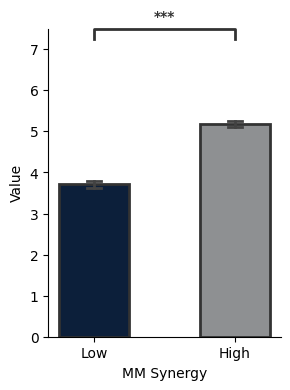

In [102]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(3, 4))
ax = sns.barplot(final, x="group", y="sy", errorbar="se", color = 'group', edgecolor = '0.2', lw = 2, 
                 capsize=0.1, errwidth=2, palette=['#041E42FF', '#8D9093FF'], width=0.5)
#ax.bar_label(ax.containers[0], fontsize=10);
#prev_lim = ax.get_ylim()[1]
max_val = final['sy'].max()
plt.plot([0, 0, 1, 1], [max_val + 0.25, max_val + 0.5, max_val + 0.5, max_val + 0.25], lw=2, color='0.2', clip_on=False)
plt.text(x = 0.5, y = max_val + 0.8, s = "***", ha = 'center', va = 'center', fontsize=10, color='0.2', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(top = max_val + 0.5)
#plt.title('Perceived Music Motion Syncronization')
plt.ylabel('Value')
plt.xlabel('MM Synergy')


Text(0.5, 0, 'MM Synergy')

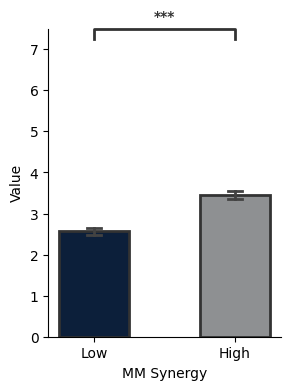

In [103]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(3, 4))
ax = sns.barplot(final, x="group", y="watch", errorbar="se", color = 'group', edgecolor = '0.2', lw = 2, 
                 capsize=0.1, errwidth=2, palette=['#041E42FF', '#8D9093FF'], width=0.5)
#ax.bar_label(ax.containers[0], fontsize=10);
#prev_lim = ax.get_ylim()[1]
max_val = final['watch'].max()
plt.plot([0, 0, 1, 1], [max_val + 0.25, max_val + 0.5, max_val + 0.5, max_val + 0.25], lw=2, color='0.2', clip_on=False)
plt.text(x = 0.5, y = max_val + 0.8, s = "***", ha = 'center', va = 'center', fontsize=10, color='0.2', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(top = max_val + 0.5)
#plt.title('Perceived Music Motion Syncronization')
plt.ylabel('Value')
plt.xlabel('MM Synergy')


In [100]:
from scipy.stats import mannwhitneyu
group_a = final[final['group'] == 'High']['pi']
group_b = final[final['group'] == 'Low']['pi']
stat, p_value = mannwhitneyu(group_a, group_b, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {stat}, P-value: {p_value}")

Mann-Whitney U Statistic: 157319.5, P-value: 5.055224588646798e-07


Text(0.5, 0, 'MM Synergy')

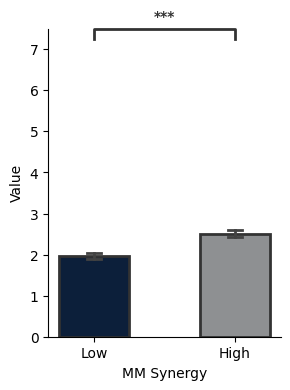

In [105]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(3, 4))
ax = sns.barplot(final, x="group", y="pi", errorbar="se", color = 'group', edgecolor = '0.2', lw = 2, 
                 capsize=0.1, errwidth=2, palette=['#041E42FF', '#8D9093FF'], width=0.5)
#ax.bar_label(ax.containers[0], fontsize=10);
#prev_lim = ax.get_ylim()[1]
max_val = final['pi'].max()
plt.plot([0, 0, 1, 1], [max_val + 0.25, max_val + 0.5, max_val + 0.5, max_val + 0.25], lw=2, color='0.2', clip_on=False)
plt.text(x = 0.5, y = max_val + 0.8, s = "***", ha = 'center', va = 'center', fontsize=10, color='0.2', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(top = max_val + 0.5)
#plt.title('Perceived Music Motion Syncronization')
plt.ylabel('Value')
plt.xlabel('MM Synergy')


In [20]:
final.groupby('group')[['sy']].mean()

,sy
group,
-1,3.709865
1,5.173996


In [28]:
final = final.set_index(['pair', 'group']).stack(dropna=False).reset_index().rename(columns={'level_2': 'metric', 0: 'value'})